## Observations and Insights 

<!-- Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. 
Include these observations at the top of notebook. -->

Based on the data captured in the scatter plots the volume of the tumor seems to be directly realted to the weight if the mouse. With the larger of the mice having on avarage proportionally larger tumors. 

The test subjects were evenly distributed across both genders, while also having a fairly consistent number of subjects in each of the various drug trials imporving the accuracy of drawing correlation based conclusions.

Based on the data collected concerning the 4 drugs listed below
'Capomulin', 'Ceftamin', 'Infubinol','Ramicane'
Capomulin and Ramicane are significantly smaller variation in data points compared to Ceftamin and Infubinol, as a result the data can be seen as more accurate with fewer values outlying values. As a result the linear regression line for Capomulin is a fairly accurate estimate of the correlation between data points and can be used to make predictions of what further data points may look like. All of them should if the regression holds fairly accurate, align with the already plotted data points. 


In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
# Display the data table for preview
combined_data.head(20)



In [3]:
combined_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [4]:
# Checking the number of mice.

total_mice = combined_data.nunique(axis=0)
total_mice = total_mice["Mouse ID"]
total_mice




249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data.loc[combined_data.duplicated(subset = ['Mouse ID', "Timepoint"]), "Mouse ID"]
duplicate


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data =  []
duplicate_data.append(duplicate)
duplicate_data


[909    g989
 911    g989
 913    g989
 915    g989
 917    g989
 Name: Mouse ID, dtype: object]

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [10]:
stats_sum = []

mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
stats_sum.append(mean)

median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
stats_sum.append(median)

var = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stats_sum.append(var)

std = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
stats_sum.append(std)

sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
stats_sum.append(sem)

sum_table = pd.DataFrame(stats_sum)
sum_table


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Tumor Volume (mm3),40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.320930,40.216745,54.233149,53.236507
Tumor Volume (mm3),41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.446266,40.673236,52.431737,51.818479
Tumor Volume (mm3),24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.852013,23.486704,59.450562,48.533355
Tumor Volume (mm3),4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.622085,4.846308,7.710419,6.966589
Tumor Volume (mm3),0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.544332,0.320955,0.573111,0.516398


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats_table = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
stats_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
mice_per_drug = clean_df[["Drug Regimen", "Mouse ID"]]
# mice_per_drug = mice_per_drug.set_index("Drug Regimen")
drug_data = pd.DataFrame(mice_per_drug)
drug_data_g = drug_data.groupby(["Drug Regimen"]).count()
drug_data_g = drug_data_g.rename(columns={"Mouse ID": "Mice Count"})

drug_data_g.head()


,Mice Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


# 

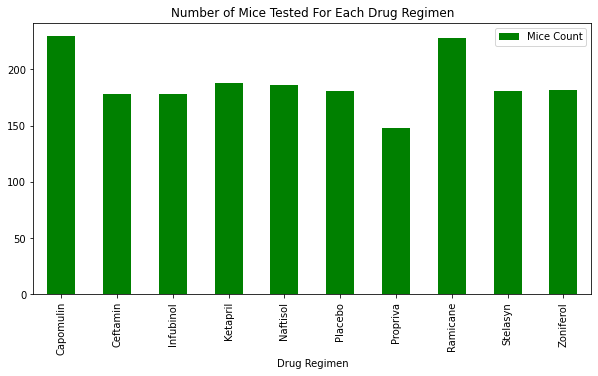

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_data_g.plot(kind='bar', figsize=(10,5), title="Number of Mice Tested For Each Drug Regimen", color="green")

plt.show()
plt.tight_layout()

In [14]:
mice_drugs = clean_df[['Mouse ID', "Drug Regimen"]]
mice_drugs
mice_count = mice_drugs.groupby(["Drug Regimen"])
output = mice_count["Mouse ID"].count()
output   


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [15]:
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
         'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']    

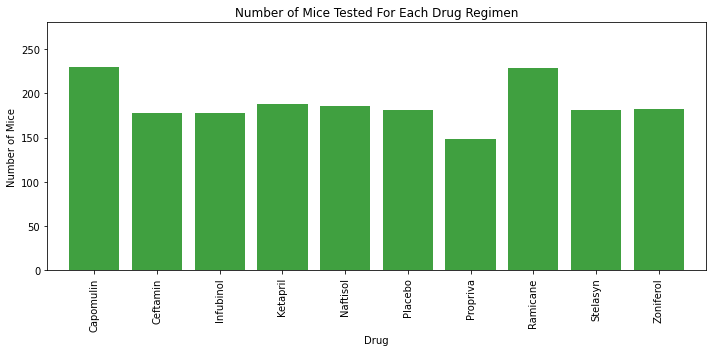

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = range(len(output))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(10,5))
plt.bar(x_axis, output, color='green', alpha=0.75, align='center')
plt.xticks(tick_locations, drugs, rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(output)+50)

plt.title("Number of Mice Tested For Each Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("Number of Mice")

plt.tight_layout()


In [17]:
mice_gender = clean_df[["Sex", "Mouse ID"]]
gender_data = pd.DataFrame(mice_gender, columns={"Mouse ID", "Sex"})
gender_data_out = gender_data.groupby(["Sex"]).count()
gender_data_out = gender_data_out.rename(columns={"Mouse ID": "Mice Count", "Sex": "Gender"})
gender_data_out





,Mice Count
Sex,
Female,922
Male,958


In [18]:
labels = ["Male", "Female"]
sizes = gender_data_out["Mice Count"]
colors = ["blue", "pink"]
explode = (0.1, 0)


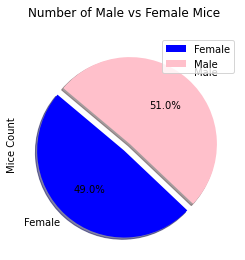

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


gender_data_out.plot(gender_data_out, explode=explode, kind='pie', subplots=True, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, title="Number of Male vs Female Mice")

plt.show()



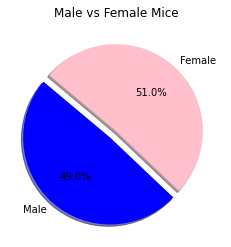

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.title('Male vs Female Mice')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor = clean_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']]
final_tumor.head(30)


# final_tumor_data = pd.DataFrame(final_tumor)
# final_tumor_data.head()
# # final_tumor = pd.DataFrame(final_tumor_data)
# final_tumor.head()


# final_tumor_vol = clean_df.loc['Drug Regimen'] == "Capomulin"
# final_tumor_vol = 

drug_data = []

capomulin_data = []
ramicane_data = []
infubinal_data = []
ceftamin_data = []
final_vol = []
max_timepoint = []

mouse_id = []
drug_regimen = []

max_timepoint = clean_df.groupby(["Mouse ID"][0]).max()["Timepoint"]
max_timepoint.append(max_timepoint)

final_vol = clean_df.groupby(["Mouse ID"][0]).max()["Tumor Volume (mm3)"]
final_vol.append(final_vol)


for drug in clean_df:    
    ramicane_data = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
    ramicane_data.append(ramicane_data)
    ramicane_data
    drug_data.append(ramicane_data)

    capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
    capomulin_data.append(capomulin_data)
    capomulin_data
    drug_data.append(capomulin_data)
      
    infubinal_data = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
    infubinal_data.append(infubinal_data)
    infubinal_data
    drug_data.append(infubinal_data)

    ceftamin_data = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]
    ceftamin_data.append(ceftamin_data)
    ceftamin_data
    drug_data.append(ceftamin_data)

final_time_vol = pd.DataFrame({'Last Time Point':max_timepoint, 'Last Volume':final_vol})

ceftamin_df = pd.DataFrame(ceftamin_data)
capomulin_df = pd.DataFrame(capomulin_data)
infubinal_df = pd.DataFrame(infubinal_data)
ramicane_df = pd.DataFrame(ramicane_data)

drug_comb = pd.concat([ramicane_df, capomulin_df, infubinal_df, ceftamin_data], join='outer', ignore_index='True')
drug_comb

mouse_id = drug_comb['Mouse ID'].unique()
drug_regimen = drug_comb['Drug Regimen'].unique()



    
# Start by getting the last (greatest) timepoint for each mouse


In [109]:
print(ceftamin_df)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
484      a275     Ceftamin  Female          20          28          0   
485      a275     Ceftamin  Female          20          28          5   
486      a275     Ceftamin  Female          20          28         10   
487      a275     Ceftamin  Female          20          28         15   
488      a275     Ceftamin  Female          20          28         20   
...       ...          ...     ...         ...         ...        ...   
1851     y865     Ceftamin    Male          23          26         25   
1852     y865     Ceftamin    Male          23          26         30   
1853     y865     Ceftamin    Male          23          26         35   
1854     y865     Ceftamin    Male          23          26         40   
1855     y865     Ceftamin    Male          23          26         45   

      Tumor Volume (mm3)  Metastatic Sites  
484            45.000000                 0  
485            46.795257         

In [22]:
# ramicane_data, capomulin_data, infubinal_data, ceftamin_data

inf_max = []
inf_max_vol = []
cef_max = []
cef_max_vol = []
cap_max_vol = []
cap_max = []
ram_max_vol = []
ram_max = []



inf_max = infubinal_data.groupby(["Mouse ID"][0]).max()["Timepoint"]
inf_max.append(inf_max)
pd.Series(inf_max)
inf_max_vol = infubinal_data.groupby(["Mouse ID"][0]).max()["Tumor Volume (mm3)"]
inf_max_vol.append(inf_max_vol)
pd.Series(inf_max_vol)
inf = pd.merge(inf_max, inf_max_vol, on='Mouse ID', how='right')

ram_max = ramicane_data.groupby(["Mouse ID"][0]).max()["Timepoint"]
ram_max.append(ram_max)
pd.Series(ram_max)
ram_max_vol = ramicane_data.groupby(["Mouse ID"][0]).max()["Tumor Volume (mm3)"]
ram_max_vol.append(ram_max_vol)
pd.Series(ram_max_vol)
ram = pd.merge(ram_max, ram_max_vol, on='Mouse ID', how='right')

cap_max = capomulin_data.groupby(["Mouse ID"][0]).max()["Timepoint"]
cap_max.append(cap_max)
pd.Series(cap_max)
cap_max_vol = capomulin_data.groupby(["Mouse ID"][0]).max()["Tumor Volume (mm3)"]
cap_max_vol.append(cap_max_vol)
pd.Series(cap_max_vol)
cap = pd.merge(cap_max, cap_max_vol, on='Mouse ID', how='right')

cef_max = ceftamin_data.groupby(["Mouse ID"][0]).max()["Timepoint"]
cef_max.append(cef_max)
pd.Series(inf_max)
cef_max_vol = ceftamin_data.groupby(["Mouse ID"][0]).max()["Tumor Volume (mm3)"]
cef_max_vol.append(cef_max_vol)
pd.Series(cef_max_vol)
cef = pd.merge(cef_max, cef_max_vol, on='Mouse ID', how='right')


max_time_max_vol = pd.concat([inf, cef, ram, cap], join='outer', ignore_index='False')
max_time_max_vol


,Timepoint,Tumor Volume (mm3)
0,45,67.973419
1,45,65.525743
2,30,57.031862
3,45,66.083066
4,45,72.226731
...,...,...
95,45,45.704434
96,10,45.000000
97,45,45.893720
98,45,45.473753


In [107]:
cef = pd.DataFrame(cef)
cap = pd.DataFrame(cap)
ram = pd.DataFrame(ram)
inf = pd.DataFrame(inf)


          Timepoint  Tumor Volume (mm3)
Mouse ID                               
a275             45           62.999356
b447              0           45.000000
b487             25           56.057749
b759             30           55.742829
f436             15           48.722078
h531              5           47.784682
j296             45           61.849023
k210             45           68.923185
l471             45           67.748662
l490             30           57.918381
l558             10           46.784535
l661             45           59.851956
l733             45           64.299830
o287             45           59.741901
p438             45           61.433892
q483             40           64.192341
t573              0           45.000000
u149             25           52.925348
u153              0           45.000000
w151             45           67.527482
x226              0           45.000000
x581             45           64.634949
x822             45           61.386660


In [103]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = cef['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume of Ceftamin is: {lowerq}")
print(f"The upper quartile of volume of Ceftamin is: {upperq}")
print(f"The interquartile range of volume of Ceftamin is: {iqr}")
print(f"The the median of volume of Ceftamin is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_volume = cef.loc[(cef['Tumor Volume (mm3)'] < lower_bound) | (cef['Tumor Volume (mm3)'] > upper_bound)]
outlier_volume    
    # Locate the rows which contain mice on each drug and get the tumor volumes
print('-------------------------------------------')    
    
    # add subset 
quartiles = cap['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume of Capomulin is: {lowerq}")
print(f"The upper quartile of volume of Capomulin is: {upperq}")
print(f"The interquartile range of volume of Capomulin is: {iqr}")
print(f"The the median of volume of Capomulin is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_volume = cap.loc[(cap['Tumor Volume (mm3)'] < lower_bound) | (cap['Tumor Volume (mm3)'] > upper_bound)]
outlier_volume     
    
print('-------------------------------------------')    
    
    # add subset 
quartiles = ram['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume of Ramicane is: {lowerq}")
print(f"The upper quartile of volume of Ramicane is: {upperq}")
print(f"The interquartile range of volume of Ramicane is: {iqr}")
print(f"The the median of volume of Ramicane is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_volume = ram.loc[(ram['Tumor Volume (mm3)'] < lower_bound) | (ram['Tumor Volume (mm3)'] > upper_bound)]
outlier_volume     

print('-------------------------------------------')    
    
    # add subset 
quartiles = inf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume of Infubinol is: {lowerq}")
print(f"The upper quartile of volume of Infubinol is: {upperq}")
print(f"The interquartile range of volume of Infubinol is: {iqr}")
print(f"The the median of volume of Infubinol is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_volume = inf.loc[(inf['Tumor Volume (mm3)'] < lower_bound) | (inf['Tumor Volume (mm3)'] > upper_bound)]
outlier_volume     
    

The lower quartile of volume of Ceftamin is: 48.72207785
The upper quartile of volume of Ceftamin is: 64.29983003
The interquartile range of volume of Ceftamin is: 15.577752179999997
The the median of volume of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
-------------------------------------------
The lower quartile of volume of Capomulin is: 45.0
The upper quartile of volume of Capomulin is: 46.74900552
The interquartile range of volume of Capomulin is: 1.7490055199999972
The the median of volume of Capomulin is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.
-------------------------------------------
The lower quartile of volume of Ramicane is: 45.0
The upper quartile of volume of Ramicane is: 46.34383237
The interquartile range of volume of Ramicane is: 1.3438323700000012
The the median of volume of Ramicane is: 45.52187471 
Values be

,Timepoint,Tumor Volume (mm3)
Mouse ID,,


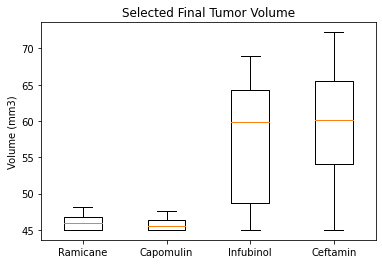

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ticks = (1, 2, 3, 4)
volume = (cap['Tumor Volume (mm3)'], ram['Tumor Volume (mm3)'], cef['Tumor Volume (mm3)'], inf['Tumor Volume (mm3)'])
fig1, ax1 = plt.subplots()
ax1.set_title('Selected Final Tumor Volume')
ax1.set_ylabel('Volume (mm3)')
ax1.boxplot(volume)
plt.xticks(ticks, labels=drug_regimen)
plt.show()    
    

## Line and Scatter Plots

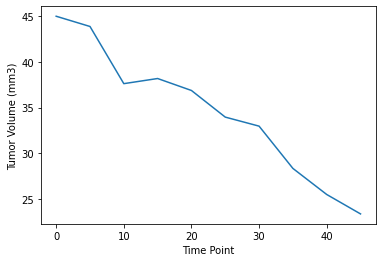

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_one = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185"]
capomulin_one = pd.DataFrame(capomulin_one)

x_axis = (capomulin_one['Timepoint'])


plt.plot(x_axis, capomulin_one['Tumor Volume (mm3)'])



plt.xlabel("Time Point")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [32]:
capomulin_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [42]:
capomulin_data.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


The correlation between both factors is 0.84
The r-squared is: 0.6962164535925333
y = 0.96x + 21.49


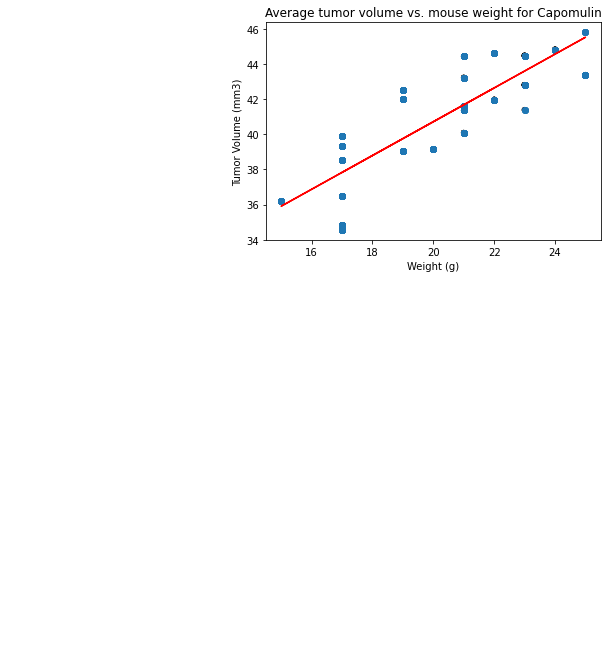

In [106]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mean_vol = []
mouse_id_cap = []
cap_weights = []
cap_mean_w_vol = []


cap_mean_vol = capomulin_data.groupby(["Mouse ID"]).mean()['Tumor Volume (mm3)']
cap_mean_vol.append(cap_mean_vol)
cap_mean = pd.DataFrame(cap_mean_vol)

mouse_id_cap = capomulin_data['Mouse ID'].unique()
cap_mouse = pd.DataFrame(mouse_id_cap, index=[mouse_id_cap]) 
cap_mouse.append([mouse_id_cap])

cap_weights = capomulin_df[['Mouse ID', 'Weight (g)']]
cap_weights = pd.DataFrame(cap_weights)

cap_mean_w_vol = pd.merge(cap_mean, cap_weights, on="Mouse ID", left_index=False)
cap_mean_w_vol = pd.DataFrame(cap_mean_w_vol)

duplicate_data = cap_mean_w_vol.loc[cap_mean_w_vol.duplicated(subset = ['Mouse ID', "Weight (g)", "Tumor Volume (mm3)"]), "Mouse ID"]
duplicate_data = duplicate_data.append(duplicate_data)
duplicate_data


array = cap_mean_w_vol["Mouse ID"].unique()
array

cap_weight = cap_mean_w_vol.groupby(["Mouse ID"]).max()["Weight (g)"]
cap_weights.append(cap_weight)
plt.title("Average tumor volume vs. mouse weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel('Tumor Volume (mm3)')
x_limit = cap_weight 
x_values = cap_mean_w_vol['Weight (g)']
y_values = cap_mean_w_vol['Tumor Volume (mm3)']

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black",
            s=x_values, alpha=0.75)
correlation = st.pearsonr(cap_weight,cap_mean_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = cap_mean_w_vol['Weight (g)']
y_values = cap_mean_w_vol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


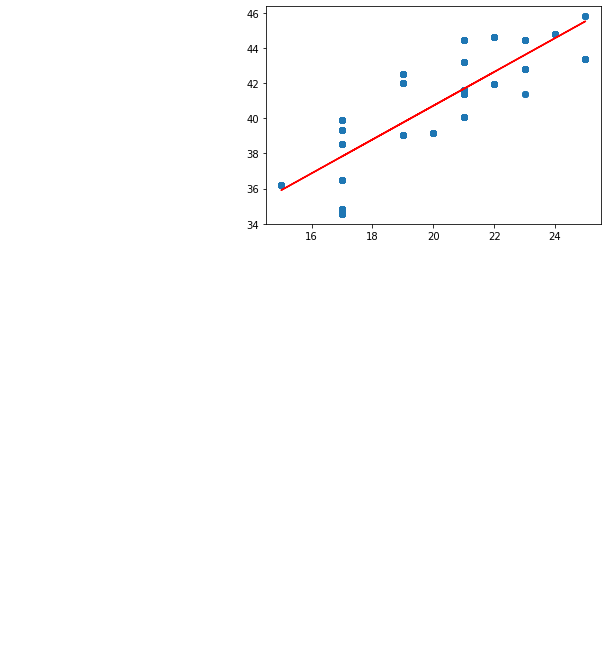

In [87]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64